findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

brain dataframe shape: (28, 26)
prostate dataframe shape: (28, 26)
acdc dataframe shape: (28, 26)
heart dataframe shape: (28, 26)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

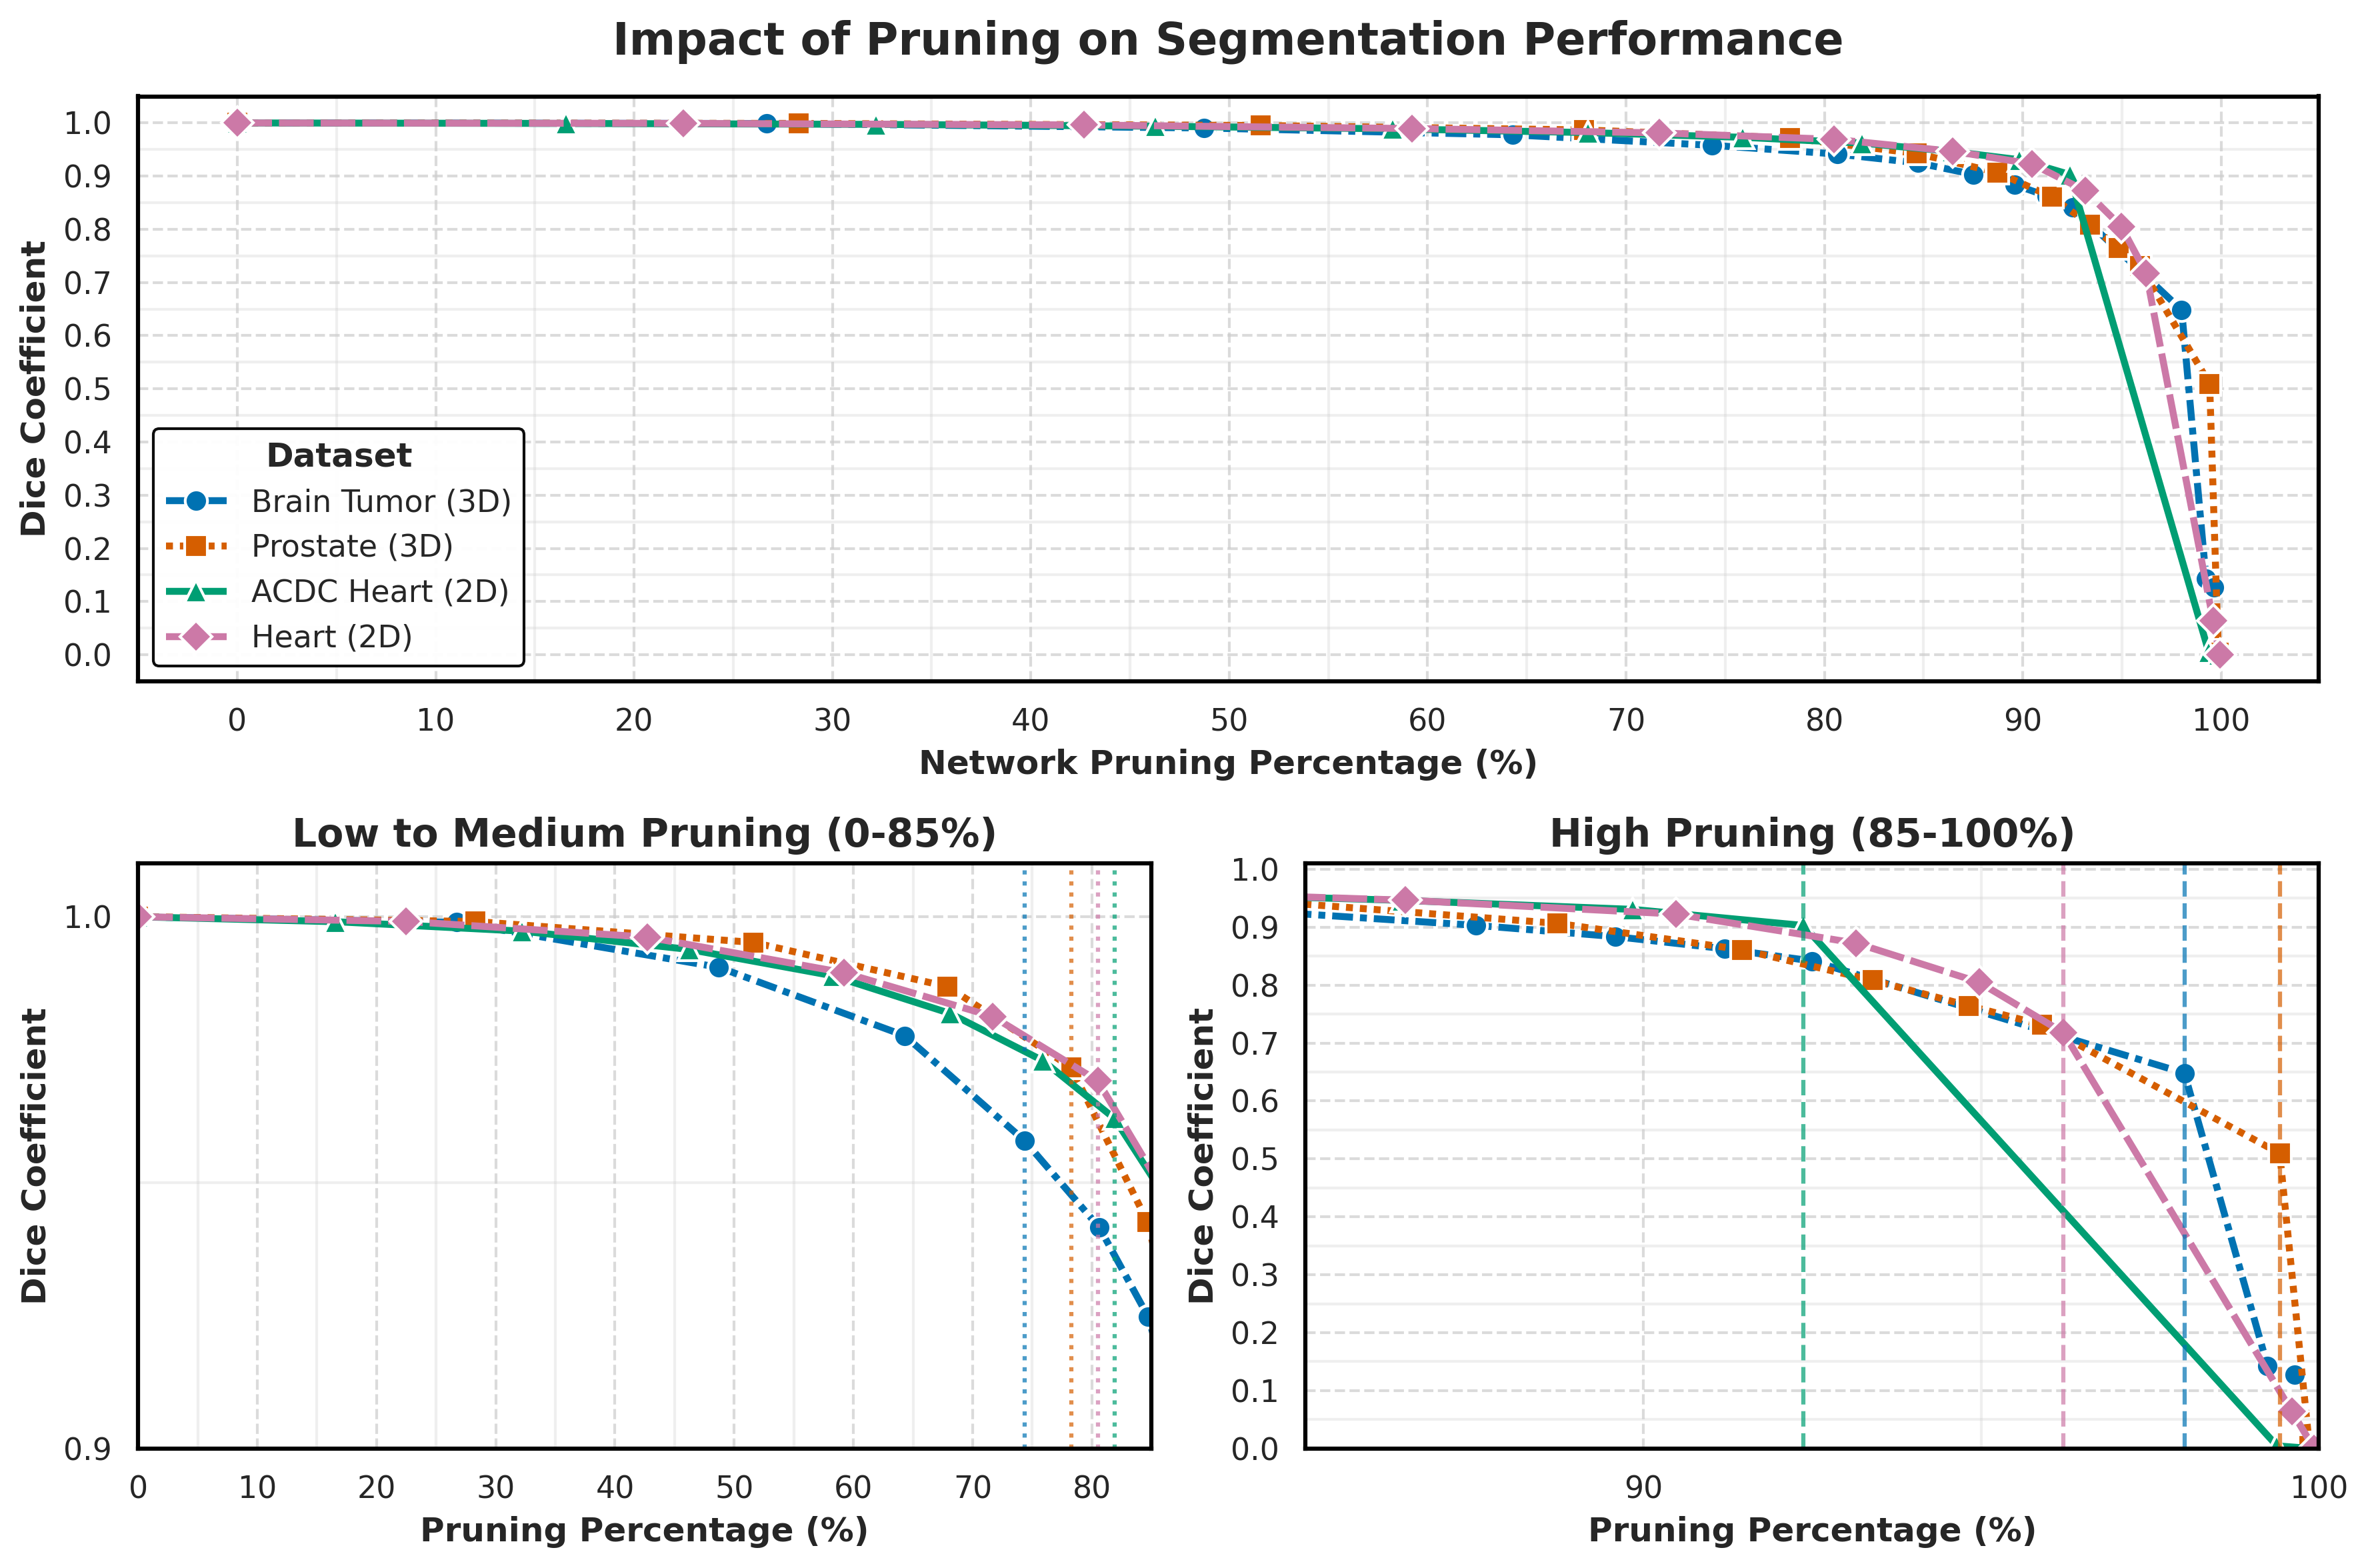


Critical pruning thresholds:
Brain Tumor (3D): 74.3%
Prostate (3D): 78.3%
ACDC Heart (2D): 81.9%
Heart (2D): 80.5%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.patches as mpatches

# Set the aesthetic style for publication-quality figures
sns.set_theme(style="whitegrid")
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 12
rcParams['axes.linewidth'] = 1.5
rcParams['axes.edgecolor'] = 'black'
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.major.width'] = 1.5

# File paths in a dictionary
file_paths = {
    "brain": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset001_BrainTumour/FlexibleTrainerV1__nnUNetPlans__3d_fullres/RangePruning/pruning_analysis_results.csv",
    "prostate": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset005_Prostate/FlexibleTrainerV1__nnUNetPlans__3d_fullres/RangePruning/pruning_analysis_results.csv",
    "acdc": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset027_ACDC/FlexibleTrainerV1__nnUNetPlans__2d/RangePruning/pruning_analysis_results.csv",
    "heart": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset002_Heart/FlexibleTrainerV1__nnUNetPlans__2d/RangePruning/pruning_analysis_results.csv"
}

# Human-readable labels for the legend
task_labels = {
    "brain": "Brain Tumor (3D)",
    "prostate": "Prostate (3D)",
    "acdc": "ACDC Heart (2D)",
    "heart": "Heart (2D)"
}

# Specify how many rows to ignore for each task (from the end after sorting)
# Adjust these values based on your requirements
rows_to_ignore = {
    "brain": 14,
    "prostate": 15,
    "acdc": 15,
    "heart": 15
}

# Color scheme suitable for scientific publication (colorblind-friendly)
colors = {
    "brain": "#0072B2",     # Blue
    "prostate": "#D55E00",  # Orange-red
    "acdc": "#009E73",       # Green
    "heart": "#CC79A7"        # Pink
}

# Line and marker styles for each dataset (making them more distinct)
line_styles = {
    "brain": (0, (3, 1, 1, 1)),  # Dash-dot-dot
    "prostate": (0, (1, 1)),     # Densely dashed
    "acdc": (0, (1, 0)),          # Solid
    "heart": (0, (5, 1))         # Long dash
}
markers = {
    "brain": "o",
    "prostate": "s", 
    "acdc": "^",
    "heart": "D"
}

# Read the CSV files into a dictionary of dataframes
dataframes = {}
for task, path in file_paths.items():
    df = pd.read_csv(path)
    # Now we'll add the pruning percentage and sort by it
    df['pruning_percentage'] = df['total_percentage']
    dataframes[task] = df
    print(f"{task} dataframe shape: {dataframes[task].shape}")

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(12, 8), dpi=300)

# Create a 2x2 grid
gs = fig.add_gridspec(2, 2)

# Create main axes that span the full width on top
ax1 = fig.add_subplot(gs[0, :])  # Main plot on top
ax2 = fig.add_subplot(gs[1, 0])  # Left subplot for 0-85% range
ax3 = fig.add_subplot(gs[1, 1])  # Right subplot for 85-100% range

# Function to plot on a given axis
def plot_data(ax, xlim=None, ylim=None):
    for task, df in dataframes.items():
        # Sort by x-axis value (pruning percentage)
        plot_df = df.sort_values(by='pruning_percentage', ascending=True)
        
        # Remove the specified number of rows from the end
        if rows_to_ignore[task] > 0:
            plot_df = plot_df.iloc[:-rows_to_ignore[task]]
        
        # Plot with professional styling
        ax.plot(plot_df['pruning_percentage'], plot_df['performance_Dice'], 
                label=task_labels[task],
                color=colors[task], 
                marker=markers[task],
                linestyle=line_styles[task],
                markersize=8,
                linewidth=2.5,
                markeredgecolor='white',
                markeredgewidth=1)
    
    # Set limits if provided
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # Add finer grid with proper styling
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(10))  # Major ticks every 10%
    ax.xaxis.set_minor_locator(MultipleLocator(5))   # Minor ticks every 5%
    ax.yaxis.set_major_locator(MultipleLocator(0.1)) # Major ticks every 0.1
    ax.yaxis.set_minor_locator(MultipleLocator(0.05)) # Minor ticks every 0.05
    ax.grid(which='minor', alpha=0.3)

# Plot on the main axis
plot_data(ax1)
ax1.set_xlabel('Network Pruning Percentage (%)', fontweight='bold')
ax1.set_ylabel('Proxy Dice Score', fontweight='bold')
ax1.set_title('Impact of Pruning on Segmentation Performance', fontsize=16, fontweight='bold', pad=15)

# Add a legend to the main plot
legend = ax1.legend(title='Dataset', 
                   loc='lower left',
                   frameon=True, 
                   framealpha=0.95,
                   edgecolor='black')
legend.get_title().set_fontweight('bold')

# Plot on the left subplot (0-85% range)
plot_data(ax2, xlim=(0, 85), ylim=(0.9, 1.01))
ax2.set_xlabel('Pruning Percentage (%)', fontweight='bold')
ax2.set_ylabel('Proxy Dice Score', fontweight='bold')
ax2.set_title('Low to Medium Pruning (0-85%)', fontsize=14, fontweight='bold')

# Plot on the right subplot (85-100% range)
plot_data(ax3, xlim=(85, 100), ylim=(0, 1.01))
ax3.set_xlabel('Pruning Percentage (%)', fontweight='bold')
ax3.set_ylabel('Proxy Dice Score', fontweight='bold')
ax3.set_title('High Pruning (85-100%)', fontsize=14, fontweight='bold')

# Instead of cluttering the graph with annotations, add vertical lines to mark critical thresholds
critical_thresholds = {}
for task, df in dataframes.items():
    plot_df = df.sort_values(by='pruning_percentage', ascending=True)
    # Find where performance drops below 95% of the original
    threshold_idx = None
    for i in range(1, len(plot_df)):
        if plot_df.iloc[i]['performance_Dice'] < 0.95 * plot_df.iloc[0]['performance_Dice']:
            threshold_idx = i - 1
            break
    
    if threshold_idx is not None and threshold_idx > 0:
        x_val = plot_df.iloc[threshold_idx]['pruning_percentage']
        critical_thresholds[task] = x_val
        
        # Add a vertical line to mark the threshold on appropriate subplot
        target_ax = ax2 if x_val < 85 else ax3
        target_ax.axvline(x=x_val, color=colors[task], linestyle=':', alpha=0.7)

# Find and mark additional critical thresholds for performance_Dice falling below 0.4
critical_thresholds_low = {}
for task, df in dataframes.items():
    plot_df = df.sort_values(by='pruning_percentage', ascending=True)
    threshold_idx_low = None
    # Loop through rows to find where performance falls below 0.4
    for i in range(1, len(plot_df)):
        if plot_df.iloc[i]['performance_Dice'] < 0.4:
            threshold_idx_low = i - 1  # take the index right before it falls below 0.4
            break
    # If a valid threshold is found and is within the plotting range
    if threshold_idx_low is not None and threshold_idx_low > 0:
        x_val_low = plot_df.iloc[threshold_idx_low]['pruning_percentage']
        critical_thresholds_low[task] = x_val_low
        # Since this threshold is relevant for the high pruning region, plot on ax3 if within range
        if x_val_low >= 85:
            ax3.axvline(x=x_val_low, color=colors[task], linestyle='--', alpha=0.7)


# Add a clean textbox outside the plot to describe critical thresholds
textstr = '\n'.join([f'{task_labels[task]} Critical: {val:.1f}%' 
                    for task, val in critical_thresholds.items()])

# Adjust layout
plt.tight_layout()
plt.savefig('improved_pruning_performance.pdf', bbox_inches='tight')
plt.savefig('improved_pruning_performance.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the critical thresholds (these can be manually added to the figure later)
print("\nCritical pruning thresholds:")
for task, val in critical_thresholds.items():
    print(f"{task_labels[task]}: {val:.1f}%")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

brain dataframe shape: (28, 26)
prostate dataframe shape: (28, 26)
acdc dataframe shape: (28, 26)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

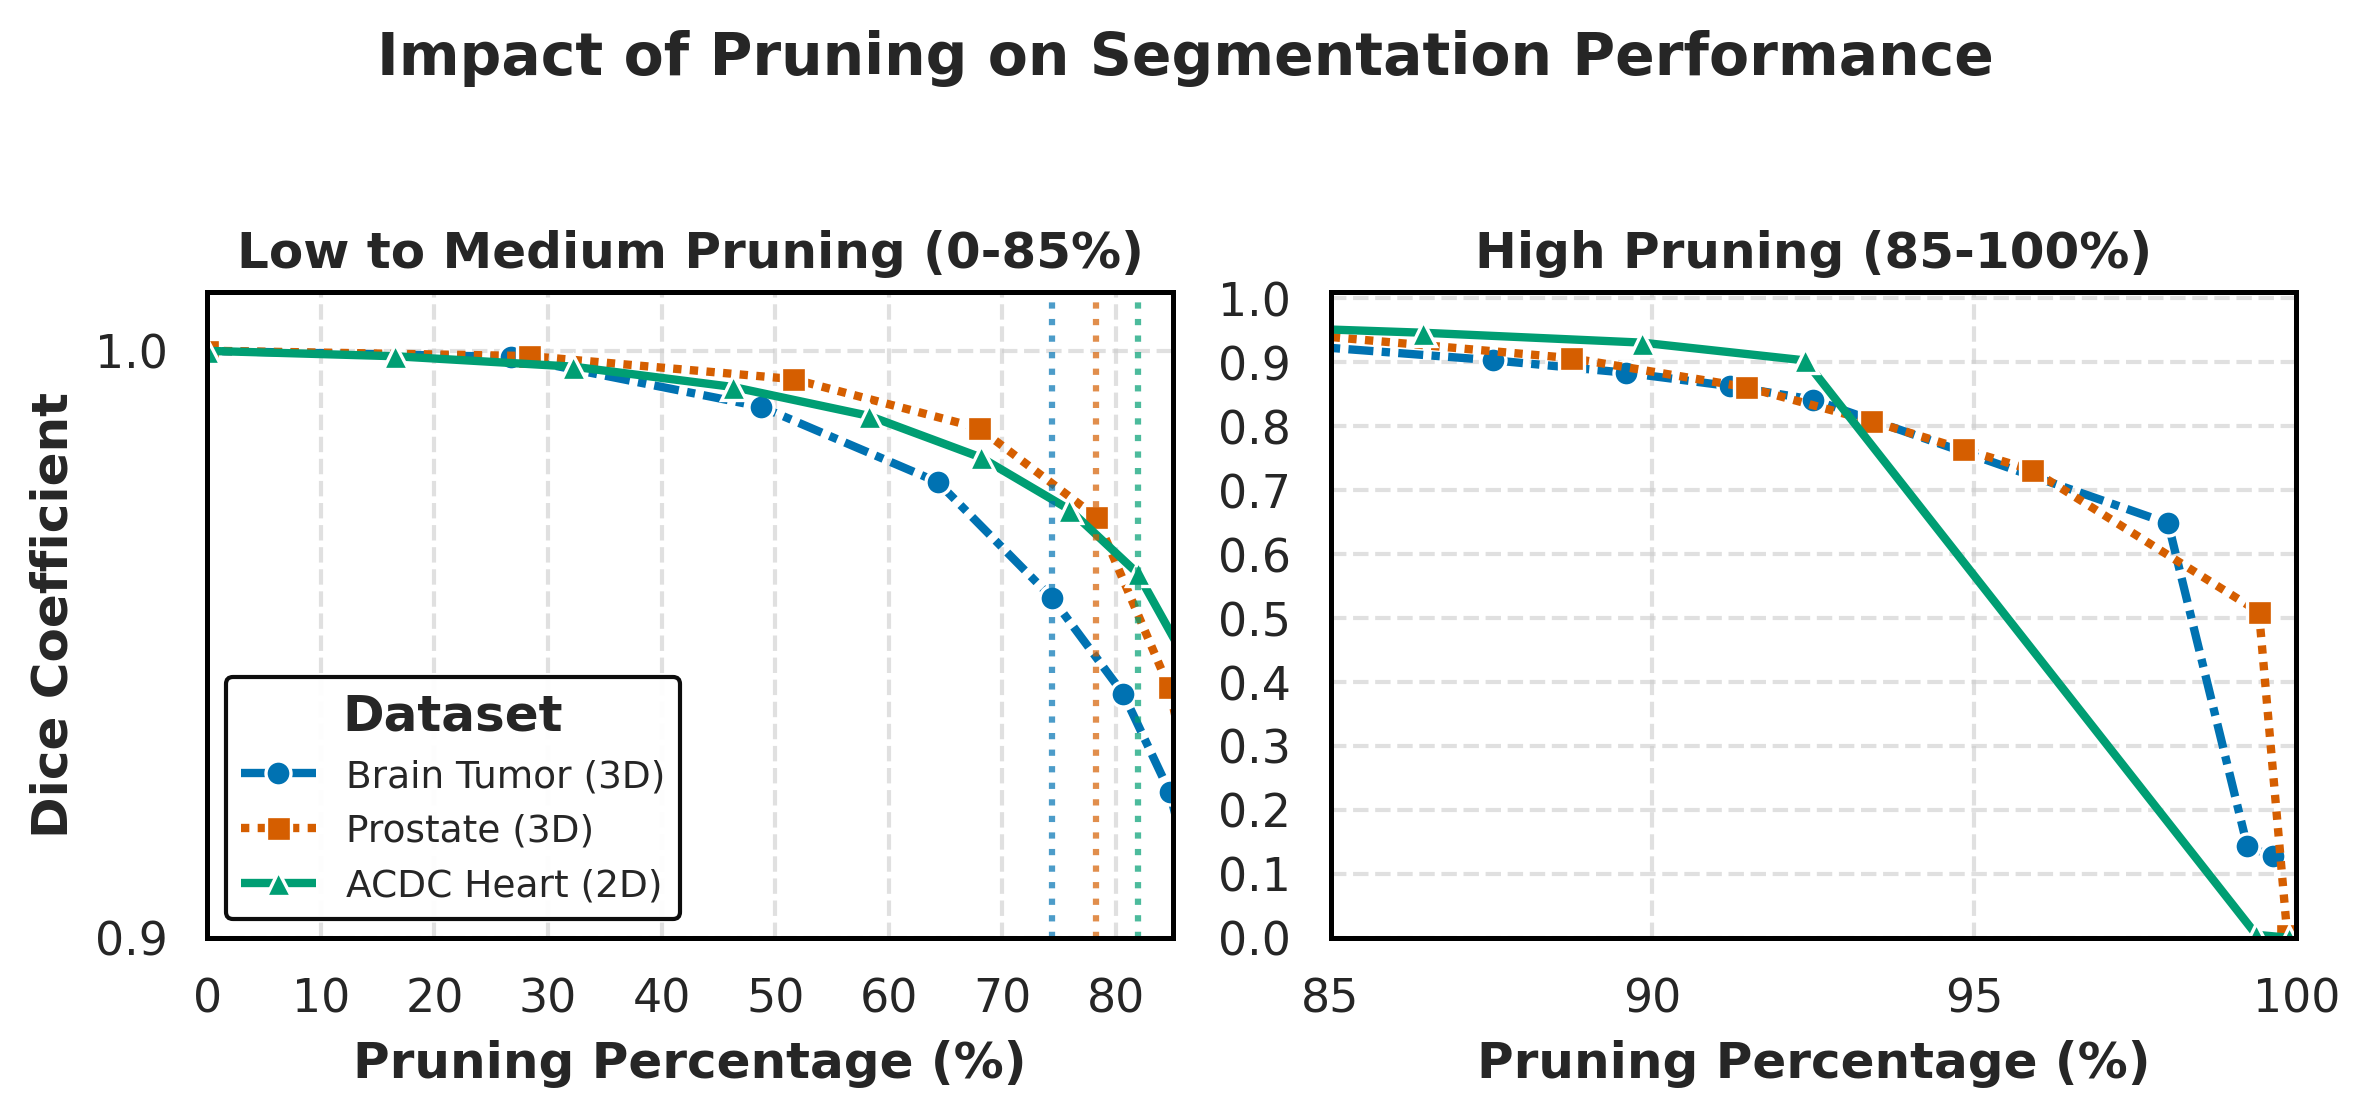


Critical pruning thresholds:
Brain Tumor (3D): 74.3%
Prostate (3D): 78.3%
ACDC Heart (2D): 81.9%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

# Compact setup with essential styling
sns.set_theme(style="whitegrid")
rcParams.update({'font.family': 'Arial', 'font.size': 10, 'axes.linewidth': 1.2, 
                'axes.edgecolor': 'black', 'xtick.major.width': 1.2, 'ytick.major.width': 1.2})

# File paths and configuration
file_paths = {
    "brain": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset001_BrainTumour/FlexibleTrainerV1__nnUNetPlans__3d_fullres/RangePruning/pruning_analysis_results.csv",
    "prostate": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset005_Prostate/FlexibleTrainerV1__nnUNetPlans__3d_fullres/RangePruning/pruning_analysis_results.csv",
    "acdc": "/media/tonguyunyang/tony_data/data/pruning_nnunet_experiment_storage/nnUNet_pruning/Dataset027_ACDC/FlexibleTrainerV1__nnUNetPlans__2d/RangePruning/pruning_analysis_results.csv"
}
task_labels = {"brain": "Brain Tumor (3D)", "prostate": "Prostate (3D)", "acdc": "ACDC Heart (2D)"}
rows_to_ignore = {"brain": 14, "prostate": 15, "acdc": 15}
colors = {"brain": "#0072B2", "prostate": "#D55E00", "acdc": "#009E73"}
line_styles = {"brain": (0, (3, 1, 1, 1)), "prostate": (0, (1, 1)), "acdc": (0, (1, 0))}
markers = {"brain": "o", "prostate": "s", "acdc": "^"}

# Load data
dataframes = {}
for task, path in file_paths.items():
    df = pd.read_csv(path)
    df['pruning_percentage'] = df['total_percentage']
    dataframes[task] = df
    print(f"{task} dataframe shape: {dataframes[task].shape}")

# Create a more compact figure with just two panels side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), dpi=300)

# Unified plotting function
def plot_data(ax, xlim, ylim, show_legend=False):
    for task, df in dataframes.items():
        plot_df = df.sort_values(by='pruning_percentage', ascending=True)
        if rows_to_ignore[task] > 0:
            plot_df = plot_df.iloc[:-rows_to_ignore[task]]
        
        ax.plot(plot_df['pruning_percentage'], plot_df['performance_Dice'], 
                label=task_labels[task], color=colors[task], marker=markers[task],
                linestyle=line_styles[task], markersize=6, linewidth=2, 
                markeredgecolor='white', markeredgewidth=0.8)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Grid setup
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(MultipleLocator(10 if xlim[1]-xlim[0] > 20 else 5))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    
    if show_legend:
        legend = ax.legend(title='Dataset', loc='lower left', frameon=True, 
                          framealpha=0.95, edgecolor='black', fontsize=9)
        legend.get_title().set_fontweight('bold')

# Plot the two panels
plot_data(ax1, xlim=(0, 85), ylim=(0.9, 1.01), show_legend=True)
ax1.set_xlabel('Pruning Percentage (%)', fontweight='bold')
ax1.set_ylabel('Dice Coefficient', fontweight='bold')
ax1.set_title('Low to Medium Pruning (0-85%)', fontsize=12, fontweight='bold')

plot_data(ax2, xlim=(85, 100), ylim=(0, 1.01))
ax2.set_xlabel('Pruning Percentage (%)', fontweight='bold')
ax2.set_title('High Pruning (85-100%)', fontsize=12, fontweight='bold')

# Add a main title for the overall figure
fig.suptitle('Impact of Pruning on Segmentation Performance', fontsize=14, fontweight='bold', y=1.05)

# Calculate and display critical thresholds
critical_thresholds = {}
for task, df in dataframes.items():
    plot_df = df.sort_values(by='pruning_percentage', ascending=True)
    for i in range(1, len(plot_df)):
        if plot_df.iloc[i]['performance_Dice'] < 0.95 * plot_df.iloc[0]['performance_Dice']:
            x_val = plot_df.iloc[i-1]['pruning_percentage']
            critical_thresholds[task] = x_val
            target_ax = ax1 if x_val < 85 else ax2
            target_ax.axvline(x=x_val, color=colors[task], linestyle=':', alpha=0.7)
            break

plt.tight_layout()
plt.savefig('pruning_performance_compact.pdf', bbox_inches='tight')
plt.savefig('pruning_performance_compact.png', dpi=300, bbox_inches='tight')
plt.show()

# Print critical thresholds
print("\nCritical pruning thresholds:")
for task, val in critical_thresholds.items():
    print(f"{task_labels[task]}: {val:.1f}%")